In [38]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
healthy = sc.read_h5ad("GSE174188/GSE174188_Healthy.h5ad")
healthy

AnnData object with n_obs × n_vars = 486418 × 1999
    obs: 'batch_cov', 'ind_cov', 'Processing_Cohort', 'louvain', 'cg_cov', 'ct_cov', 'L3', 'ind_cov_batch_cov', 'Age', 'Sex', 'pop_cov', 'Status', 'SLE_status', 'cell_type'
    var: 'gene_ids'
    uns: 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
cell_type = list(set(healthy.obs.cell_type))
cell_type

['Progen', 'NK', 'Prolif', 'CD4 T', 'Monocyte', 'CD8 T', 'PB', 'DC', 'B']

# remove < 0.5%

In [4]:
sample = list(set(healthy.obs.ind_cov))

rows_to_remove = []
for i in sample:
    healthy = healthy[healthy.obs.Status == "Healthy", :]
    if healthy[healthy.obs.ind_cov == i,:].n_obs < healthy.n_obs*0.005:
        rows_to_remove.append(i)
    healthy_filter = healthy[~healthy.obs.ind_cov.isin(rows_to_remove),:]    
    
healthy_filter

View of AnnData object with n_obs × n_vars = 474740 × 1999
    obs: 'batch_cov', 'ind_cov', 'Processing_Cohort', 'louvain', 'cg_cov', 'ct_cov', 'L3', 'ind_cov_batch_cov', 'Age', 'Sex', 'pop_cov', 'Status', 'SLE_status', 'cell_type'
    var: 'gene_ids'
    uns: 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

# separate each person

In [5]:
sample = list(set(healthy_filter.obs.ind_cov))

personal = {}
for i in sample:
    if i not in personal:
        personal[i] = healthy[healthy.obs.ind_cov == i, :]
# 將personal進行排序
sorted_personal = dict(sorted(personal.items(), key=lambda x: x[1].obs.Age[0]))

In [14]:
with open("pearson_negative_celltype_genes_top200_remove 0.5%_ENSG.csv", 'r') as file:
    negative_top200 = pd.read_csv(file, index_col = 0)
with open("pearson_positive_celltype_genes_top200_remove 0.5%_ENSG.csv", 'r') as file:
    positive_top200 = pd.read_csv(file, index_col = 0)
negative_top200

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Prolif,ENSG00000169435,ENSG00000173821,ENSG00000125148,ENSG00000160613,ENSG00000113448,ENSG00000172794,ENSG00000187837,ENSG00000121895,ENSG00000010810,ENSG00000034677,...,ENSG00000054793,ENSG00000135842,ENSG00000163599,ENSG00000150527,ENSG00000077984,ENSG00000110651,ENSG00000168813,ENSG00000172867,ENSG00000153898,ENSG00000049247
NK,ENSG00000164825,ENSG00000198851,ENSG00000115523,ENSG00000231500,ENSG00000197971,ENSG00000140030,ENSG00000143184,ENSG00000142089,ENSG00000109321,ENSG00000185338,...,ENSG00000153071,ENSG00000158417,ENSG00000100100,ENSG00000005379,ENSG00000185864,ENSG00000065883,ENSG00000154310,ENSG00000198756,ENSG00000148362,ENSG00000064886
CD8 T,ENSG00000100097,ENSG00000122026,ENSG00000100100,ENSG00000168685,ENSG00000231500,ENSG00000126353,ENSG00000154814,ENSG00000074966,ENSG00000256039,ENSG00000237943,...,ENSG00000069188,ENSG00000249709,ENSG00000182463,ENSG00000267458,ENSG00000237499,ENSG00000007350,ENSG00000161267,ENSG00000272369,ENSG00000273448,ENSG00000268362
Progen,ENSG00000162747,ENSG00000110092,ENSG00000259747,ENSG00000240403,ENSG00000137259,ENSG00000213934,ENSG00000161610,ENSG00000243772,ENSG00000237343,ENSG00000205595,...,ENSG00000137642,ENSG00000170921,ENSG00000173926,ENSG00000100300,ENSG00000092853,ENSG00000240303,ENSG00000188112,ENSG00000179094,ENSG00000168497,ENSG00000139971
CD4 T,ENSG00000198502,ENSG00000122026,ENSG00000251562,ENSG00000126353,ENSG00000100100,ENSG00000168685,ENSG00000134954,ENSG00000124766,ENSG00000166669,ENSG00000070081,...,ENSG00000263874,ENSG00000126870,ENSG00000091879,ENSG00000102804,ENSG00000230148,ENSG00000234663,ENSG00000145088,ENSG00000157168,ENSG00000160229,ENSG00000165929
DC,ENSG00000272211,ENSG00000198502,ENSG00000008517,ENSG00000109321,ENSG00000237541,ENSG00000100453,ENSG00000188825,ENSG00000235162,ENSG00000132965,ENSG00000169583,...,ENSG00000135976,ENSG00000111863,ENSG00000104660,ENSG00000234572,ENSG00000113088,ENSG00000180871,ENSG00000227468,ENSG00000146433,ENSG00000187837,ENSG00000173064
B,ENSG00000110092,ENSG00000198502,ENSG00000023445,ENSG00000247982,ENSG00000237541,ENSG00000100100,ENSG00000077238,ENSG00000008517,ENSG00000196781,ENSG00000171681,...,ENSG00000185198,ENSG00000196937,ENSG00000107362,ENSG00000112486,ENSG00000188994,ENSG00000223547,ENSG00000225746,ENSG00000110042,ENSG00000163697,ENSG00000268220
Monocyte,ENSG00000134954,ENSG00000110848,ENSG00000198502,ENSG00000120738,ENSG00000155307,ENSG00000188825,ENSG00000118515,ENSG00000204103,ENSG00000008517,ENSG00000169508,...,ENSG00000138435,ENSG00000109906,ENSG00000251323,ENSG00000119632,ENSG00000163739,ENSG00000116661,ENSG00000183508,ENSG00000169583,ENSG00000135218,ENSG00000143851
PB,ENSG00000225135,ENSG00000128656,ENSG00000205595,ENSG00000224020,ENSG00000237253,ENSG00000197632,ENSG00000243772,ENSG00000215764,ENSG00000110092,ENSG00000121895,...,ENSG00000185928,ENSG00000079931,ENSG00000155307,ENSG00000172031,ENSG00000230587,ENSG00000007350,ENSG00000100721,ENSG00000067369,ENSG00000175463,ENSG00000135116


In [26]:
# only select top 20 gene
negative_top20 = negative_top200.drop(columns = negative_top200.columns[20:], axis = 1)

positive_top20 = positive_top200.drop(columns = positive_top200.columns[20:], axis = 1)

# 取交集的

In [39]:
# 把negative跟positive取交集之後的genes
# 1 2 4 5 6 7 代表 NK,CD8 T,CD4 T,DC,B,Monocyte
N_common_genes = set(negative_top20.iloc[1]).union(set(negative_top20.iloc[2]), set(negative_top20.iloc[4]),
                                         set(negative_top20.iloc[5]), set(negative_top20.iloc[6]),
                                         set(negative_top20.iloc[7]))
P_common_genes = set(positive_top20.iloc[1]).union(set(positive_top20.iloc[2]), set(positive_top20.iloc[4]),
                                         set(positive_top20.iloc[5]), set(positive_top20.iloc[6]),
                                         set(positive_top20.iloc[7]))
# 將每個gene and cell type做一個區分
N_common_genes_celltype = []
P_common_genes_celltype = []
for i in N_common_genes:
    for j in cell_type:
        if j != "PB" and j != "Prolif" and j != "Progen":
            N_common_genes_celltype.append(f"{i}_{j}")

for i in P_common_genes:
    for j in cell_type:
        if j != "PB" and j != "Prolif" and j != "Progen":
            P_common_genes_celltype.append(f"{i}_{j}")

set(N_common_genes_celltype)
set(P_common_genes_celltype)


N_common_genes_celltype

['ENSG00000138795_NK',
 'ENSG00000138795_CD4 T',
 'ENSG00000138795_Monocyte',
 'ENSG00000138795_CD8 T',
 'ENSG00000138795_DC',
 'ENSG00000138795_B',
 'ENSG00000109321_NK',
 'ENSG00000109321_CD4 T',
 'ENSG00000109321_Monocyte',
 'ENSG00000109321_CD8 T',
 'ENSG00000109321_DC',
 'ENSG00000109321_B',
 'ENSG00000172005_NK',
 'ENSG00000172005_CD4 T',
 'ENSG00000172005_Monocyte',
 'ENSG00000172005_CD8 T',
 'ENSG00000172005_DC',
 'ENSG00000172005_B',
 'ENSG00000170476_NK',
 'ENSG00000170476_CD4 T',
 'ENSG00000170476_Monocyte',
 'ENSG00000170476_CD8 T',
 'ENSG00000170476_DC',
 'ENSG00000170476_B',
 'ENSG00000171681_NK',
 'ENSG00000171681_CD4 T',
 'ENSG00000171681_Monocyte',
 'ENSG00000171681_CD8 T',
 'ENSG00000171681_DC',
 'ENSG00000171681_B',
 'ENSG00000160932_NK',
 'ENSG00000160932_CD4 T',
 'ENSG00000160932_Monocyte',
 'ENSG00000160932_CD8 T',
 'ENSG00000160932_DC',
 'ENSG00000160932_B',
 'ENSG00000023445_NK',
 'ENSG00000023445_CD4 T',
 'ENSG00000023445_Monocyte',
 'ENSG00000023445_CD8 T',
 '

In [41]:
with open('mean_and_stdev_GSE174188.csv', 'r') as file:
    mean_and_std = pd.read_csv(file, index_col = 0)
mean_and_std

,age,mean_NK,mean_CD4T,mean_CD8T,mean_B,mean_Monocyte,mean_DC,std_NK,std_CD4T,std_CD8T,std_B,std_Monocyte,std_DC
HC-519,21.0,4.314572,2.133783,2.541044,2.215008,4.253415,0.955883,0.749347,0.353081,0.584568,0.393406,0.637790,0.118725
HC-520,22.0,7.153296,3.301596,3.623819,3.417949,5.683097,2.127246,1.075921,0.482696,0.534613,0.643028,0.588125,0.341599
IGTB1974_IGTB1974,23.0,6.240312,3.362070,3.934211,3.586159,5.945434,1.678427,0.715059,0.403406,0.749296,0.694991,0.680489,0.182131
IGTB1916_IGTB1916,23.0,6.880955,3.331587,4.258295,3.541119,5.522082,1.260744,0.729470,0.341525,0.502310,0.471973,0.672437,0.190104
IGTB1987_IGTB1987,23.0,7.512489,3.378382,3.627870,3.844986,5.890706,1.375918,0.796269,0.332629,0.541650,0.573292,0.713794,0.174472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,68.0,7.208837,3.344849,3.248580,2.823516,4.768369,0.810205,1.062078,0.568459,0.532761,0.497388,0.852107,0.109943
HC-536,71.0,7.569259,3.111927,3.789331,3.000617,4.916469,0.894743,0.831347,0.479433,0.538535,0.471832,0.625976,0.123043
HC-524,73.0,6.719375,2.766531,2.898888,2.875474,4.815088,1.840851,0.730996,0.472372,0.482450,0.642658,0.790643,0.326397
HC-022,74.0,5.529320,3.158104,3.673651,2.728781,4.927634,1.145823,0.754341,0.674691,0.649673,0.637683,0.604755,0.164673


In [42]:
# 每個gene expression的平均
P_mean_gene = {}
for i in mean_and_std.index:
    # 取得個人的anndata
    positive = select_anndata(sorted_personal[i], P_common_genes)
    P_mean_gene_df = pd.DataFrame()
    for j in cell_type:
        # 避免某些cell type被比較到
        if j != "PB" and j != "Prolif" and j != "Progen":
            mean_P = []
            anndata = positive[positive.obs.cell_type == j,:]
            for k in range(len(anndata.X.T)):
                # get gene expression mean
                mean_P.append(float(np.mean(anndata.X.T[k])))
            # get each mean to each person
            P_mean_gene[i] = mean_P
            pd_test = pd.DataFrame(P_mean_gene)
            # 將mean接在後面
            P_mean_gene_df = pd.concat([P_mean_gene_df, pd_test], ignore_index=True)
            
# 進行transpose之後再將不同的columns放上對應的gene & cell type
P_mean_gene_df = P_mean_gene_df.T
P_mean_gene_df.columns = P_common_genes_celltype 

,ENSG00000169554_NK,ENSG00000169554_CD4 T,ENSG00000169554_Monocyte,ENSG00000169554_CD8 T,ENSG00000169554_DC,ENSG00000169554_B,ENSG00000204287_NK,ENSG00000204287_CD4 T,ENSG00000204287_Monocyte,ENSG00000204287_CD8 T,...,ENSG00000257764_Monocyte,ENSG00000257764_CD8 T,ENSG00000257764_DC,ENSG00000257764_B,ENSG00000155130_NK,ENSG00000155130_CD4 T,ENSG00000155130_Monocyte,ENSG00000155130_CD8 T,ENSG00000155130_DC,ENSG00000155130_B
HC-519,-0.560973,-0.469242,-0.531939,-0.865698,-0.992536,-0.445699,-0.102889,-0.036657,0.572034,-0.506105,...,-0.168516,-0.120834,-0.639617,-0.237658,-0.302768,-0.398376,-0.192401,-0.035851,-0.127042,-0.607092
HC-520,-0.482784,-0.449814,-0.483832,-1.005528,-1.080587,-0.429062,-0.116305,-0.051662,1.086274,-0.618140,...,-0.208018,-0.129760,-0.716205,-0.210033,-0.316339,-0.450534,-0.247915,-0.022677,-0.203581,-0.688211
IGTB1974_IGTB1974,-0.630202,-0.509899,-0.589475,-1.007388,-1.108511,-0.574667,-0.104741,-0.127600,1.618418,-0.853218,...,-0.348341,-0.289026,-0.786604,-0.328731,-0.385479,-0.516661,-0.382293,-0.039901,-0.180973,-0.732401
IGTB1916_IGTB1916,-0.618695,-0.499737,-0.640758,-1.068994,-1.086970,-0.544948,-0.114232,-0.127600,1.495341,-0.842430,...,-0.321092,-0.251487,-0.797902,-0.290262,-0.393337,-0.549382,-0.372543,-0.061401,-0.175628,-0.767135
IGTB1987_IGTB1987,-0.622648,-0.479934,-0.583601,-1.022853,-1.096073,-0.567389,-0.099784,-0.127600,1.509532,-0.840012,...,-0.330969,-0.304121,-0.834706,-0.249690,-0.334926,-0.498295,-0.375880,-0.025680,-0.119856,-0.731657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,-0.502941,-0.384132,-0.511934,-0.937857,-1.102151,-0.390825,-0.086352,-0.053703,1.054375,-0.651547,...,-0.216271,-0.135437,-0.659248,-0.239468,-0.243632,-0.471768,-0.272854,0.223870,-0.224711,-0.543405
HC-536,-0.517434,-0.476037,-0.501462,-0.939479,-1.132636,-0.395028,-0.090238,-0.026658,0.988924,-0.646745,...,-0.213686,-0.191662,-0.726544,-0.380109,-0.263548,-0.493277,-0.282905,0.147453,-0.192355,-0.653672
HC-524,-0.541670,-0.445939,-0.532615,-0.654187,-0.977884,-0.279349,-0.102074,-0.051662,1.627741,-0.631118,...,-0.215416,-0.142089,-0.717744,-0.108725,-0.345931,-0.451367,-0.262272,0.851081,-0.206192,-0.369375
HC-022,-0.508318,-0.400440,-0.505854,-0.861354,-1.025592,-0.429193,-0.056657,-0.053703,0.897328,-0.599675,...,-0.212032,-0.143435,-0.658944,-0.372970,-0.308511,-0.470088,-0.259795,0.017369,-0.240559,-0.591314


In [43]:
# 將top200 的 gene 挑出來
def select_anndata(anndata, df):
    # 先挑 cell type
    #select_celltype = anndata[anndata.obs.cell_type == cell_type]
    # 在取交集
    negative = df.intersection(set(anndata.var.gene_ids))
    negative_index = anndata.var.gene_ids.isin(negative)
    # 將挑好的cell type取出top 200 genes
    anndata_negative = anndata[:, negative_index]
    
    return anndata_negative

# 將6種cell type的top200gene取交集之後取平均
def mean_gene_expression_by_person(anndata, mean_and_std, N_common_genes, N_common_genes_celltype, P_common_genes, P_common_genes_celltype):
    # 每個gene expression的平均
    N_mean_gene = {}
    P_mean_gene = {}
    
    for i in mean_and_std.index:
        # 取得個人的anndata
        negative = select_anndata(anndata[i], N_common_genes)
        positive = select_anndata(anndata[i], P_common_genes)
        N_mean_gene_df = pd.DataFrame()
        P_mean_gene_df = pd.DataFrame()
        for j in cell_type:
            # 避免某些cell type被比較到
            if j != "PB" and j != "Prolif" and j != "Progen":
                mean_N = []
                mean_P = []
                anndata_N = negative[negative.obs.cell_type == j,:]
                anndata_P = positive[positive.obs.cell_type == j,:]
                for k in range(len(anndata_N.X.T)):
                    # get gene expression mean
                    mean_N.append(float(np.mean(anndata_N.X.T[k])))
                    
                for k in range(len(anndata_P.X.T)):
                    # get gene expression mean
                    mean_P.append(float(np.mean(anndata_P.X.T[k])))
                    
                # get each mean to each person
                N_mean_gene[i] = mean_N
                P_mean_gene[i] = mean_P
                
                N_df_temp = pd.DataFrame(N_mean_gene)
                P_df_temp = pd.DataFrame(P_mean_gene)
                
                # 將mean接在後面
                N_mean_gene_df = pd.concat([N_mean_gene_df, N_df_temp], ignore_index=True)
                P_mean_gene_df = pd.concat([P_mean_gene_df, P_df_temp], ignore_index=True)

    # 進行transpose之後再將不同的columns放上對應的gene & cell type
    N_mean_gene_df = N_mean_gene_df.T
    N_mean_gene_df.columns = N_common_genes_celltype 
    
    P_mean_gene_df = P_mean_gene_df.T
    P_mean_gene_df.columns = P_common_genes_celltype 
    

    return N_mean_gene_df, P_mean_gene_df

In [45]:
N_mean_gene_df, P_mean_gene_df = mean_gene_expression_by_person(sorted_personal, mean_and_std, N_common_genes, N_common_genes_celltype, P_common_genes, P_common_genes_celltype) 

In [46]:
N_mean_gene_df

,ENSG00000138795_NK,ENSG00000138795_CD4 T,ENSG00000138795_Monocyte,ENSG00000138795_CD8 T,ENSG00000138795_DC,ENSG00000138795_B,ENSG00000109321_NK,ENSG00000109321_CD4 T,ENSG00000109321_Monocyte,ENSG00000109321_CD8 T,...,ENSG00000100453_Monocyte,ENSG00000100453_CD8 T,ENSG00000100453_DC,ENSG00000100453_B,ENSG00000172243_NK,ENSG00000172243_CD4 T,ENSG00000172243_Monocyte,ENSG00000172243_CD8 T,ENSG00000172243_DC,ENSG00000172243_B
HC-519,-0.141385,-0.301061,-0.096311,0.035925,0.243353,-0.101049,-0.044679,0.264474,-0.228000,-0.316578,...,-0.317513,0.483200,-0.071784,-0.168516,1.131063,0.044131,-0.092064,-0.607092,-0.046723,-0.159479
HC-520,-0.166786,-0.512530,-0.158055,0.116472,0.794546,-0.139231,-0.091395,0.242922,-0.372976,-0.373318,...,-0.519729,0.316989,-0.089464,-0.208018,1.431527,0.389641,-0.006011,-0.688211,0.048500,-0.215699
IGTB1974_IGTB1974,-0.207133,-0.608090,-0.181426,-0.119771,1.478776,-0.195127,-0.146155,0.545966,-0.590517,-0.323777,...,-0.565897,0.678229,-0.176314,-0.348341,1.566345,0.263925,-0.127789,-0.732401,-0.219223,-0.245015
IGTB1916_IGTB1916,-0.183894,-0.608502,-0.189062,-0.130039,1.012770,-0.189698,-0.143043,0.391008,-0.603866,-0.360733,...,-0.599089,0.496654,-0.258114,-0.321092,1.375945,0.300707,-0.153734,-0.767135,-0.228065,-0.273634
IGTB1987_IGTB1987,-0.207617,-0.578613,-0.205257,-0.201383,0.996319,-0.176924,-0.156412,0.470978,-0.579348,-0.315725,...,-0.533068,0.815908,-0.204283,-0.330969,1.304207,0.242466,-0.069114,-0.731657,-0.159072,-0.296252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,-0.183127,-0.498914,-0.151821,-0.002697,0.693615,-0.160988,-0.091367,0.419423,-0.354067,-0.386709,...,-0.537851,0.315163,-0.165527,-0.216271,1.013824,0.234855,-0.251981,-0.543405,0.057442,-0.217817
HC-536,-0.192451,-0.528441,-0.130035,-0.137710,0.573699,-0.152195,-0.071174,0.207829,-0.355401,-0.366797,...,-0.502816,0.459180,-0.211160,-0.213686,1.370301,0.255256,-0.241653,-0.653672,-0.002986,-0.301791
HC-524,-0.167587,-0.511963,-0.161167,-0.275197,0.368315,-0.161460,-0.082583,0.245124,-0.355030,-0.370288,...,-0.517543,1.625921,-0.159165,-0.215416,0.229458,0.284246,-0.381119,-0.369375,-0.090260,-0.132880
HC-022,-0.093902,-0.494161,-0.158841,-0.084426,0.749568,-0.161947,-0.075395,0.047223,-0.338461,-0.347711,...,-0.530880,0.582105,-0.103305,-0.212032,1.188682,0.203830,-0.251853,-0.591314,0.000517,-0.292143


In [47]:
# 使用merge函数将两个DataFrame合并
df = pd.concat([mean_and_std,N_mean_gene_df,P_mean_gene_df], axis = 1)
# 將DataFrame寫到CSV中
df.to_csv('model_training_data_20240122.csv', index=True)
df

,age,mean_NK,mean_CD4T,mean_CD8T,mean_B,mean_Monocyte,mean_DC,std_NK,std_CD4T,std_CD8T,...,ENSG00000257764_Monocyte,ENSG00000257764_CD8 T,ENSG00000257764_DC,ENSG00000257764_B,ENSG00000155130_NK,ENSG00000155130_CD4 T,ENSG00000155130_Monocyte,ENSG00000155130_CD8 T,ENSG00000155130_DC,ENSG00000155130_B
HC-519,21.0,4.314572,2.133783,2.541044,2.215008,4.253415,0.955883,0.749347,0.353081,0.584568,...,-0.168516,-0.120834,-0.639617,-0.237658,-0.302768,-0.398376,-0.192401,-0.035851,-0.127042,-0.607092
HC-520,22.0,7.153296,3.301596,3.623819,3.417949,5.683097,2.127246,1.075921,0.482696,0.534613,...,-0.208018,-0.129760,-0.716205,-0.210033,-0.316339,-0.450534,-0.247915,-0.022677,-0.203581,-0.688211
IGTB1974_IGTB1974,23.0,6.240312,3.362070,3.934211,3.586159,5.945434,1.678427,0.715059,0.403406,0.749296,...,-0.348341,-0.289026,-0.786604,-0.328731,-0.385479,-0.516661,-0.382293,-0.039901,-0.180973,-0.732401
IGTB1916_IGTB1916,23.0,6.880955,3.331587,4.258295,3.541119,5.522082,1.260744,0.729470,0.341525,0.502310,...,-0.321092,-0.251487,-0.797902,-0.290262,-0.393337,-0.549382,-0.372543,-0.061401,-0.175628,-0.767135
IGTB1987_IGTB1987,23.0,7.512489,3.378382,3.627870,3.844986,5.890706,1.375918,0.796269,0.332629,0.541650,...,-0.330969,-0.304121,-0.834706,-0.249690,-0.334926,-0.498295,-0.375880,-0.025680,-0.119856,-0.731657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,68.0,7.208837,3.344849,3.248580,2.823516,4.768369,0.810205,1.062078,0.568459,0.532761,...,-0.216271,-0.135437,-0.659248,-0.239468,-0.243632,-0.471768,-0.272854,0.223870,-0.224711,-0.543405
HC-536,71.0,7.569259,3.111927,3.789331,3.000617,4.916469,0.894743,0.831347,0.479433,0.538535,...,-0.213686,-0.191662,-0.726544,-0.380109,-0.263548,-0.493277,-0.282905,0.147453,-0.192355,-0.653672
HC-524,73.0,6.719375,2.766531,2.898888,2.875474,4.815088,1.840851,0.730996,0.472372,0.482450,...,-0.215416,-0.142089,-0.717744,-0.108725,-0.345931,-0.451367,-0.262272,0.851081,-0.206192,-0.369375
HC-022,74.0,5.529320,3.158104,3.673651,2.728781,4.927634,1.145823,0.754341,0.674691,0.649673,...,-0.212032,-0.143435,-0.658944,-0.372970,-0.308511,-0.470088,-0.259795,0.017369,-0.240559,-0.591314


# XGBR

In [48]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [49]:
with open("model_training_data_20240122.csv", 'r') as file:
    df = pd.read_csv(file, index_col = 0)
with open("Proportion_by_person_20240110.csv", 'r') as file:
    df_proportion = pd.read_csv(file, index_col = 0)
with open("GSE174188_Healthy_kmeans_20240122.csv", 'r') as file:
    df_kmeans = pd.read_csv(file, index_col = 0)

df_proportion = df_proportion/100
df_proportion.index = df.index
age = df["age"].astype(int)
#df = df.drop(columns = ["mean_DC","std_NK", "std_CD4T", "std_CD8T", "std_B", "std_Monocyte", "std_DC"], axis = 1 )
df = df.drop(columns = "age", axis = 1)
df = pd.concat([df, df_proportion, df_kmeans], axis = 1, ignore_index=False)
df

,mean_NK,mean_CD4T,mean_CD8T,mean_B,mean_Monocyte,mean_DC,std_NK,std_CD4T,std_CD8T,std_B,...,CD8T_kmeans_1,CD8T_kmeans_2,NK_kmeans_1,NK_kmeans_2,Monocyte_kmeans_1,Monocyte_kmeans_2,DC_kmeans_1,DC_kmeans_2,B_kmeans_1,B_kmeans_2
HC-519,4.314572,2.133783,2.541044,2.215008,4.253415,0.955883,0.749347,0.353081,0.584568,0.393406,...,0.661955,0.338045,0.534351,0.465649,0.093849,0.906151,0.727273,0.272727,0.615789,0.384211
HC-520,7.153296,3.301596,3.623819,3.417949,5.683097,2.127246,1.075921,0.482696,0.534613,0.643028,...,0.206849,0.793151,0.721154,0.278846,0.089362,0.910638,0.894737,0.105263,0.341121,0.658879
IGTB1974_IGTB1974,6.240312,3.362070,3.934211,3.586159,5.945434,1.678427,0.715059,0.403406,0.749296,0.694991,...,0.622087,0.377913,0.791469,0.208531,0.222362,0.777638,0.754717,0.245283,0.313636,0.686364
IGTB1916_IGTB1916,6.880955,3.331587,4.258295,3.541119,5.522082,1.260744,0.729470,0.341525,0.502310,0.471973,...,0.631510,0.368490,0.865248,0.134752,0.125917,0.874083,0.841270,0.158730,0.501229,0.498771
IGTB1987_IGTB1987,7.512489,3.378382,3.627870,3.844986,5.890706,1.375918,0.796269,0.332629,0.541650,0.573292,...,0.380165,0.619835,0.827381,0.172619,0.282885,0.717115,0.508475,0.491525,0.404706,0.595294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,7.208837,3.344849,3.248580,2.823516,4.768369,0.810205,1.062078,0.568459,0.532761,0.497388,...,0.806202,0.193798,0.966667,0.033333,0.279070,0.720930,0.870968,0.129032,0.605670,0.394330
HC-536,7.569259,3.111927,3.789331,3.000617,4.916469,0.894743,0.831347,0.479433,0.538535,0.471832,...,0.598698,0.401302,0.694323,0.305677,0.101179,0.898821,0.960000,0.040000,0.330846,0.669154
HC-524,6.719375,2.766531,2.898888,2.875474,4.815088,1.840851,0.730996,0.472372,0.482450,0.642658,...,0.625000,0.375000,0.946984,0.053016,0.247629,0.752371,0.704545,0.295455,0.937812,0.062188
HC-022,5.529320,3.158104,3.673651,2.728781,4.927634,1.145823,0.754341,0.674691,0.649673,0.637683,...,0.771996,0.228004,0.906667,0.093333,0.153578,0.846422,0.650000,0.350000,0.382671,0.617329


# 寫檔
df.to_csv('GSE174188_Healthy_model_20240122.csv', index=True)

Cross-validation scores:  [-0.96722287  0.09605841  0.39627394  0.7657421   0.03724134  0.54667845
 -8.60541978  0.30927751 -5.23243998  0.16657845]
Mean Squared Error (MSE): 281.31501729015855
Mean Absolute Error (MAE): 11.7897209368254
Train Set score:  0.9999313586441108
Test Set score:  0.02029055893662579
Pearson correlation: 0.36759357239934104


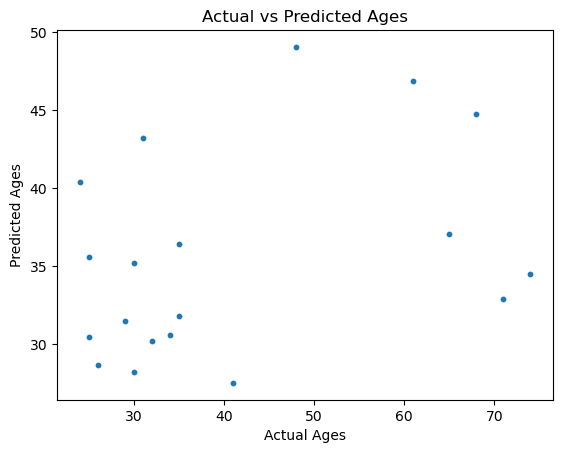

特徵重要程度:  [0.0000000e+00 0.0000000e+00 1.6311134e-05 ... 0.0000000e+00 4.4287995e-07
 0.0000000e+00]


In [90]:
X_train, X_test, y_train, y_test = train_test_split(df, age, test_size=0.2)#, random_state=0)
# n_jobs=-1處理器全開
xgbrModel = xgb.XGBRegressor(n_estimators = 45, n_jobs=-1, max_depth = 5,
                             colsample_bytree = 1, gamma = 0, min_child_weight = 3,
                            subsample = 0.9, eval_metric="rmse")  
# 創建k折交叉驗證對象
kf = KFold(n_splits=10, shuffle=True)

# 進行 k-fold cross-validation，例如 k=10
scores = cross_val_score(xgbrModel, df, age, cv=kf)
print('Cross-validation scores: ', scores)

# train model with early stopping
eval_set = [(X_test, y_test)]
xgbrModel.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

y_pred = xgbrModel.predict(X_test)

# 計算均方誤差（Mean Squared Error, MSE）
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# 計算平均絕對誤差（Mean Absolute Error, MAE）
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# 預測成功的比例
print('Train Set score: ',xgbrModel.score(X_train,y_train))
print('Test Set score: ',xgbrModel.score(X_test,y_test))
# 計算皮爾森相關係數
corr, _ = pearsonr(y_test, y_pred)
print(f'Pearson correlation: {corr}')
plt.scatter(y_test, y_pred, s=10, label='True')
plt.xlabel('Actual Ages')
plt.ylabel('Predicted Ages')
plt.title('Actual vs Predicted Ages')
plt.show()

    
print('特徵重要程度: ',xgbrModel.feature_importances_)

# RFR

In [63]:
def RandomForestRegression(X, y, test_size=0.3, n_estimators=10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)#, random_state=0)
    # n_jobs=-1處理器全開
    RFR = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1)# , random_state=0
    # 進行 k-fold cross-validation，例如 k=10
    scores = cross_val_score(RFR, X, y, cv=10)
    print('Cross-validation scores: ', scores)

    # train model
    RFR.fit(X_train, y_train)

    y_pred = RFR.predict(X_test)

    # 計算均方誤差（Mean Squared Error, MSE）
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (MSE): {mse}')

    # 計算平均絕對誤差（Mean Absolute Error, MAE）
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error (MAE): {mae}')

    # 預測成功的比例
    print('Train Set score: ',RFR.score(X_train,y_train))
    print('Test Set score: ',RFR.score(X_test,y_test))

    # 計算皮爾森相關係數
    corr, _ = pearsonr(y_test, y_pred)
    print(f'Pearson correlation: {corr}')

    plt.scatter(y_test, y_pred, s=10, label='True')
    plt.xlabel('Actual Ages')
    plt.ylabel('Predicted Ages')
    plt.title('Actual vs Predicted Ages')
    plt.show()
    
    
    print('特徵重要程度: ',RFR.feature_importances_)
    #print('樹的深度: ',RFR.get_depth)

Cross-validation scores:  [-341.00793539 -194.6715        0.          -63.10197917  -79.64140625
 -143.2334375  -207.77890625   -1.22098477   -8.6830125   -47.93567224]
Mean Squared Error (MSE): 52.31283482142858
Mean Absolute Error (MAE): 5.906250000000001
Train Set score:  0.8867821767103563
Test Set score:  0.46399102802028325
Pearson correlation: 0.8054190036303192


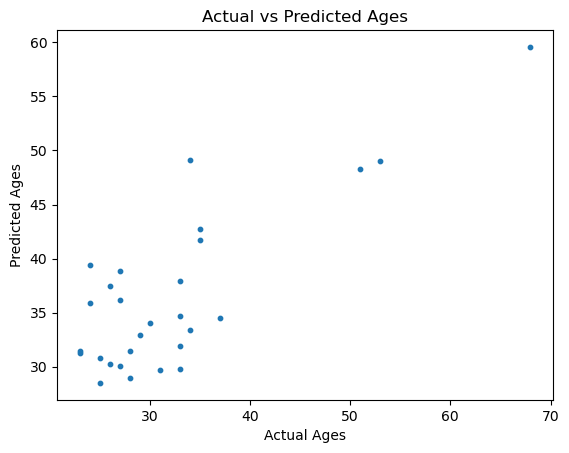

特徵重要程度:  [0.00000000e+00 0.00000000e+00 1.21113999e-05 ... 2.76547596e-03
 1.20039148e-06 4.28568902e-05]


In [74]:
RandomForestRegression(df, age, test_size=0.3, n_estimators=40)

# 沒有取交集的

In [51]:
# 將top200 的 gene 挑出來
def select_anndata(anndata, df, cell_type):
    # 先挑 cell type
    select_celltype = anndata[anndata.obs.cell_type == cell_type]
    # 在取交集
    negative = set(df.iloc[1]).intersection(set(anndata.var.gene_ids))
    negative_index = anndata.var.gene_ids.isin(negative)
    # 將挑好的cell type取出top 200 genes
    anndata_negative = select_celltype[:, negative_index]
    
    return anndata_negative


In [52]:
NK_negative = select_anndata(personal['HC-519'], negative_top200, "NK")

In [53]:
NK_negative

View of AnnData object with n_obs × n_vars = 131 × 200
    obs: 'batch_cov', 'ind_cov', 'Processing_Cohort', 'louvain', 'cg_cov', 'ct_cov', 'L3', 'ind_cov_batch_cov', 'Age', 'Sex', 'pop_cov', 'Status', 'SLE_status', 'cell_type'
    var: 'gene_ids'
    uns: 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
N_mean_gene = {}
for i in mean_and_std.index:
    mean = []
    for j in range(len(NK_negative.X.T)):
        mean.append(float(np.mean(NK_negative.X.T[j])))
    N_mean_gene[i] = mean
N_mean_gene_df = pd.DataFrame(N_mean_gene)
N_mean_gene_df = N_mean_gene_df.T
N_mean_gene_df.columns = N_common_genes


P_mean_gene = {}
for i in mean_and_std.index:
    mean = []
    for j in range(len(NK_positive.X.T)):
        mean.append(float(np.mean(NK_positive.X.T[j])))
    P_mean_gene[i] = mean
P_mean_gene_df = pd.DataFrame(P_mean_gene)
P_mean_gene_df = P_mean_gene_df.T
P_mean_gene_df.columns = P_common_genes
mean

In [54]:
with open('mean_and_stdev_GSE174188.csv', 'r') as file:
    mean_and_std = pd.read_csv(file, index_col = 0)
#mean_and_std["N_NK"] = mean
mean_and_std

,age,mean_NK,mean_CD4T,mean_CD8T,mean_B,mean_Monocyte,mean_DC,std_NK,std_CD4T,std_CD8T,std_B,std_Monocyte,std_DC
HC-519,21.0,4.314572,2.133783,2.541044,2.215008,4.253415,0.955883,0.749347,0.353081,0.584568,0.393406,0.637790,0.118725
HC-520,22.0,7.153296,3.301596,3.623819,3.417949,5.683097,2.127246,1.075921,0.482696,0.534613,0.643028,0.588125,0.341599
IGTB1974_IGTB1974,23.0,6.240312,3.362070,3.934211,3.586159,5.945434,1.678427,0.715059,0.403406,0.749296,0.694991,0.680489,0.182131
IGTB1916_IGTB1916,23.0,6.880955,3.331587,4.258295,3.541119,5.522082,1.260744,0.729470,0.341525,0.502310,0.471973,0.672437,0.190104
IGTB1987_IGTB1987,23.0,7.512489,3.378382,3.627870,3.844986,5.890706,1.375918,0.796269,0.332629,0.541650,0.573292,0.713794,0.174472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC-540,68.0,7.208837,3.344849,3.248580,2.823516,4.768369,0.810205,1.062078,0.568459,0.532761,0.497388,0.852107,0.109943
HC-536,71.0,7.569259,3.111927,3.789331,3.000617,4.916469,0.894743,0.831347,0.479433,0.538535,0.471832,0.625976,0.123043
HC-524,73.0,6.719375,2.766531,2.898888,2.875474,4.815088,1.840851,0.730996,0.472372,0.482450,0.642658,0.790643,0.326397
HC-022,74.0,5.529320,3.158104,3.673651,2.728781,4.927634,1.145823,0.754341,0.674691,0.649673,0.637683,0.604755,0.164673


In [57]:
mean_gene = {}
for i in mean_and_std.index:
    mean = []
    for j in range(len(NK_negative.X.T)):
        mean.append(float(np.mean(NK_negative.X.T[j])))
    mean_gene[i] = mean

In [955]:
age

HC-519               21
HC-520               22
IGTB1974_IGTB1974    23
IGTB1916_IGTB1916    23
IGTB1987_IGTB1987    23
                     ..
HC-540               68
HC-536               71
HC-524               73
HC-022               74
IGTB1731_IGTB1731    75
Name: age, Length: 92, dtype: int32